In [44]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
from pathlib import Path
import numpy as np
import csv

dir_path= Path('..', 'data')
data_path= Path(dir_path,'bh_DS.csv' )
data_file= pd.read_csv(data_path)
print(data_file.columns)
data_file=data_file.drop(columns=[' id', ' who CH' ,' Time', ' Dist_To_CH', 'Rank', ' dist_CH_To_BS', ' send_code '])

x= data_file.values
print(x.shape)

shp= int(x.shape[0])

y=np.empty((shp, 1), dtype=str)
count=0
for a in x:
    if a[11] =='Normal':
        y[count]='N'
    else:
        y[count]='A'
    count=count+1
    
#print(x.shape )
#print (y.shape)
xtrain, xtest, ytrain, ytest = train_test_split(data_file.values,y,train_size=0.75, stratify= data_file['Attack type'])
        
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
#print(ytrain)
myfile= open('tt_BHbasic.csv', 'w')
#print(xtrain)
with myfile:
    writer= csv.writer(myfile)
    writer.writerow(data_file.columns)
    writer.writerows(xtrain)
    writer.writerows(xtest)

ys= open('labels_BHbasic.csv', 'w')
with ys:
    writer=csv.writer(ys)
    writer.writerows(ytrain)
    writer.writerows(ytest)

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Consumed Energy',
       'Attack type'],
      dtype='object')
(364612, 12)
(273459, 12)
(91153, 12)
(273459, 1)
(91153, 1)


In [45]:
data_path= Path('tt_BHbasic.csv' )
data_file= pd.read_csv(data_path)
data_file=data_file.drop(columns=['Attack type'])

print(data_file.columns)
allx= data_file.values
#print(allx.shape)
xtrain= allx[0:xtrain.shape[0]]
xtest= allx[xtrain.shape[0]: xtrain.shape[0]+xtest.shape[0]]
print(xtrain.shape)
print(xtest.shape)

Index([' Is_CH', ' ADV_S', ' ADV_R', ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R',
       ' DATA_S', ' DATA_R', ' Data_Sent_To_BS', 'Consumed Energy'],
      dtype='object')
(273459, 11)
(91153, 11)


In [46]:
cls=DecisionTreeClassifier()

cls=cls.fit(xtrain,ytrain)

y_pred=cls.predict(xtest)
print("Accuracy:", metrics.accuracy_score(ytest, y_pred))
print(metrics.confusion_matrix(ytest, y_pred).ravel())
#tn, fp, fn, tp 
print(metrics.classification_report(ytest, y_pred))

Accuracy: 0.9944818053163362
[ 5881   255   248 84769]
              precision    recall  f1-score   support

           A       0.96      0.96      0.96      6136
           N       1.00      1.00      1.00     85017

    accuracy                           0.99     91153
   macro avg       0.98      0.98      0.98     91153
weighted avg       0.99      0.99      0.99     91153



In [47]:
dir_path= Path('..', 'data')
data_path= Path(dir_path,'blk_hole.csv' )
data_file= pd.read_csv(data_path)
print(data_file.columns)
data_file=data_file.drop(columns=[' id', ' who CH' ,' Time', ' Dist_To_CH', 'Rank', ' dist_CH_To_BS', ' send_code ','Attack type' ])
data_dump=data_file.values

x_blk=data_dump

x_btest= np.concatenate((xtest, data_dump), 0)
y_blk=np.empty((data_dump.shape[0], 1), dtype=str)
count=0
for a in y_blk:
    y_blk[count]='A'
    count=count+1
    
y_btest= np.concatenate((ytest, y_blk),0)


Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Consumed Energy',
       'Attack type'],
      dtype='object')


In [48]:
myfile= open('test_wt_blkhole.csv', 'w')
#print(xtrain)
with myfile:
    writer= csv.writer(myfile)
    writer.writerow(data_file.columns)
    writer.writerows(x_btest)

ys= open('labels_wt_blkhole.csv', 'w')
with ys:
    writer=csv.writer(ys)
    writer.writerows(ytrain)
    writer.writerows(y_blk)

In [49]:
y_bh_only=cls.predict(x_blk)

print("Accuracy:", metrics.accuracy_score(y_blk, y_bh_only))

print(metrics.confusion_matrix(y_blk, y_bh_only).ravel())
#tn, fp, fn, tp 
print(metrics.classification_report(y_blk, y_bh_only))

Accuracy: 0.8413772514678077
[8455 1594    0    0]
              precision    recall  f1-score   support

           A       1.00      0.84      0.91     10049
           N       0.00      0.00      0.00         0

    accuracy                           0.84     10049
   macro avg       0.50      0.42      0.46     10049
weighted avg       1.00      0.84      0.91     10049



C:\Users\Amy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


518


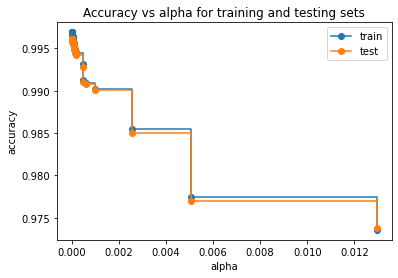

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs=[]
print(ccp_alphas.size)
# print(ccp_alphas)
a_section= ccp_alphas[450:]
for ccp_alpha in a_section:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)
    
clfs = clfs[:-1]
a_section = a_section[:-1]


train_scores = [clf.score(xtrain, ytrain) for clf in clfs]
test_scores = [clf.score(xtest, ytest) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(a_section, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(a_section, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()



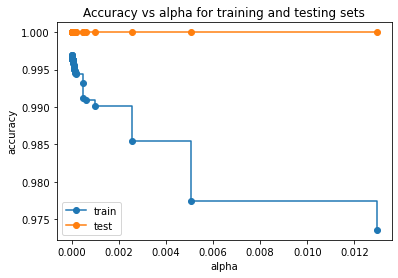

In [61]:
test_scores = [clf.score(x_blk, y_blk) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(a_section, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(a_section, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [62]:
KO=clfs[0]
y_pred=KO.predict(x_btest)

#print("Accuracy:", metrics.accuracy_score(y_ftest, y_floodpred))
print(metrics.classification_report(y_btest, y_pred))
print(metrics.confusion_matrix(y_btest, y_pred).ravel())
#tn, fp, fn, tp  

              precision    recall  f1-score   support

           A       0.99      0.99      0.99     16185
           N       1.00      1.00      1.00     85017

    accuracy                           1.00    101202
   macro avg       0.99      0.99      0.99    101202
weighted avg       1.00      1.00      1.00    101202

[16008   177   182 84835]


In [63]:
y_pred=KO.predict(x_blk)

#print("Accuracy:", metrics.accuracy_score(y_ftest, y_floodpred))
print(metrics.classification_report(y_blk, y_pred))

print(metrics.confusion_matrix(y_blk, y_pred).ravel())
#tn, fp, fn, tp 

              precision    recall  f1-score   support

           A       1.00      1.00      1.00     10049

    accuracy                           1.00     10049
   macro avg       1.00      1.00      1.00     10049
weighted avg       1.00      1.00      1.00     10049

[10049]


In [43]:
import emlearn
cmodel = emlearn.convert(KO, method='inline')
cmodel.save(file='sonar.h')

'\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nEmlTreesNode sonar_nodes[265] = {\n  { 0, 0.5, 1, 2 },\n  { -1, 1, -1, -1 },\n  { 9, 6.5, 3, 36 },\n  { 2, 0.5, 4, 13 },\n  { 9, 2.5, 5, 9 },\n  { 9, 1.5, 6, 7 },\n  { 4, 34.5, 7, 8 },\n  { -1, 0, -1, -1 },\n  { 5, 18.0, 1, 7 },\n  { 5, 0.5, 10, 7 },\n  { 10, 0.2305000051856041, 7, 11 },\n  { 10, 0.42906999588012695, 12, 1 },\n  { 10, 0.42694999277591705, 1, 7 },\n  { 8, 200.5, 14, 33 },\n  { 10, 0.002104999963194132, 1, 15 },\n  { 10, 0.07810499891638756, 16, 22 },\n  { 4, 29.5, 17, 20 },\n  { 10, 0.06555499881505966, 18, 7 },\n  { 4, 19.5, 7, 19 },\n  { 5, 10.5, 1, 7 },\n  { 5, 15.5, 21, 7 },\n  { 10, 0.01850000023841858, 1, 7 },\n  { 9, 1.5, 7, 23 },\n  { 2, 8.5, 24, 27 },\n  { 8, 2.5, 25, 7 },\n  { 9, 2.5, 26, 1 },\n  { 10, 0.14673999696969986, 1, 7 },\n  { 2, 13.0, 28, 7 },\n  { 2, 11.5, 29, 1 },\n  { 10, 0.22090499848127365, 30, 32 },\n  { 9, 3.5, 31, 1 },\n  { 10, 0.17325499653816223, 7